# RF классификатор

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv("dermatology.data")
dataset

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
354,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
355,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
356,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [4]:
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 30, 50, 100],
              'max_features': ['auto', 'sqrt', 'log2']}
 
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True)

In [5]:
#Выделяем признак, по которому будем классифицировать объекты
target_feature='spongiosis'
data = dataset.drop([target_feature], axis=1)
target = dataset[target_feature]

#Разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.7)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
RandomForestClassifier(n_estimators=10)


In [5]:
print(target.unique())

[0 1 2 3]


In [6]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
print("Общая точность: ", metrics.accuracy_score(y_test, y_pred=pred))
print("Precision: ", metrics.precision_score(y_test, y_pred=pred, average='weighted'))
print("Recall: ", metrics.recall_score(y_test, y_pred=pred, average='weighted'))
print("F1-measure: ", metrics.f1_score(y_test, y_pred=pred, average='weighted'))
#print(metrics.classification_report(y_test, y_pred=pred))

Общая точность:  0.9442231075697212
Precision:  0.9050061562118596
Recall:  0.9442231075697212
F1-measure:  0.9238058119488918


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


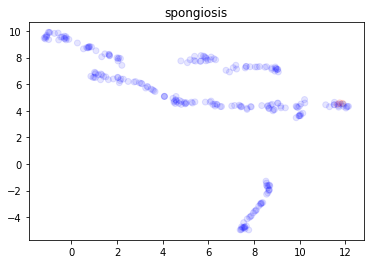

In [7]:
import umap
reducer = umap.UMAP()
#Уменьшаем размерность данных и опорных векторов
X_test_2d = pd.DataFrame(reducer.fit_transform(X_test))

import matplotlib.pyplot as plt
colormap = np.array(['b', 'g', 'r', 'y'])

plt.title(target_feature)
plt.scatter(X_test_2d[0], X_test_2d[1], alpha=0.1, c=colormap[pred], cmap='viridis')

plt.show()

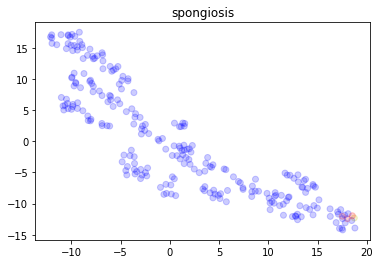

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

X_test_2d = pd.DataFrame(tsne.fit_transform(X_test))

import matplotlib.pyplot as plt
colormap = np.array(['b', 'g', 'r', 'y'])

plt.title(target_feature)
plt.scatter(X_test_2d[0], X_test_2d[1], alpha=0.2, c=colormap[pred], cmap='viridis')

plt.show()